# Classifier Trainig

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import pickle

import sys, os

In [3]:
N_EPOCHS = 500
N_FEATURES = 6 # accel.x, accel.y, accel.z, gyro.x, gyro.y, gyro.z 
# N_FEATURES = 3 # accel.x, accel.y, accel.z
SAMPLE_LEN = 100

## Read Data

In [4]:

samples= {
    'Rest':    [],
    'Up':      [],
    # 'Down':    [],
    'Forward': []
    # 'Back':    []
}

# C:\Users\itaym\Documents\limudim\semester_8\sequence_labler\output\Back_0000.csv
sample_files_dir = "C:/Users/nitay/Desktop/robotic_hand_project/code/ML/samples"
#sample_files_dir = os.path.join('C:/','Users','itaym','Documents','limudim','semester_8','sequence_labler','output')

for sample_file in os.listdir(sample_files_dir):
    if sample_file == 'old':
        continue
    label, _ = sample_file.split('_')
    if label in ('Down', 'Back'):
        label = 'Rest'
    s = pd.read_csv(os.path.join(sample_files_dir,sample_file)).infer_objects()[['accX','accY','accZ','gyroX','gyroY','gyroZ']].to_numpy()
    samples[label].append(s.ravel())

# FIXME: remove hard coded labels here
X = np.array(samples['Rest'] + samples['Up'] + samples['Forward'])
y = np.array([0 for _ in samples['Rest']] +
             [1 for _ in samples['Up']] +
             [2 for _ in samples['Forward']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Data Preview

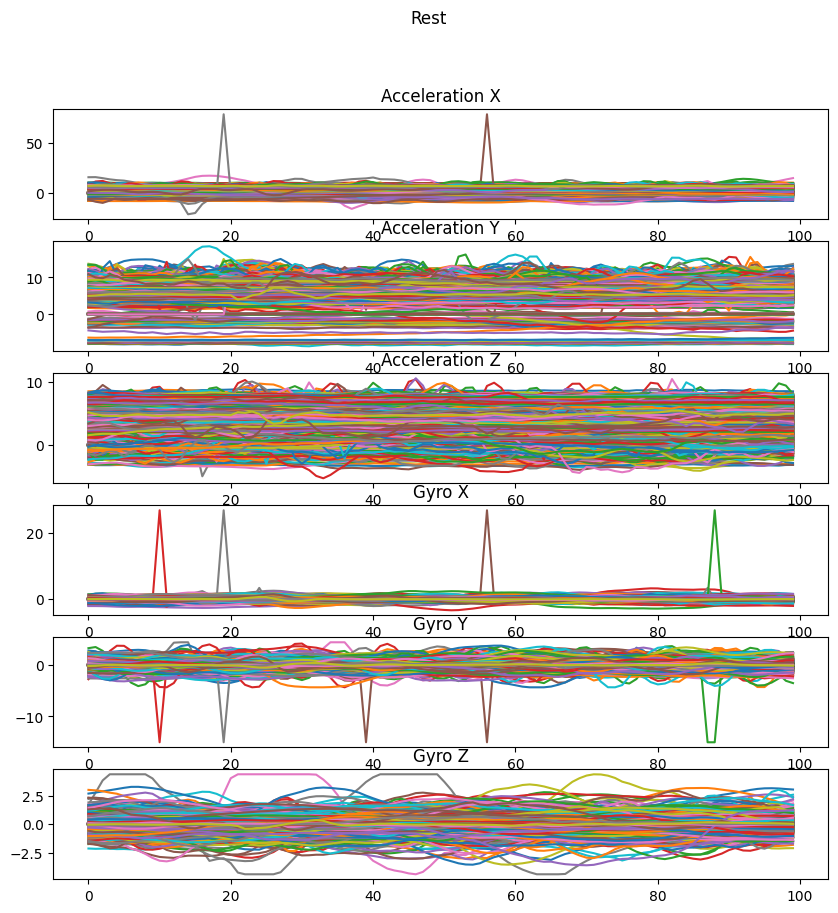

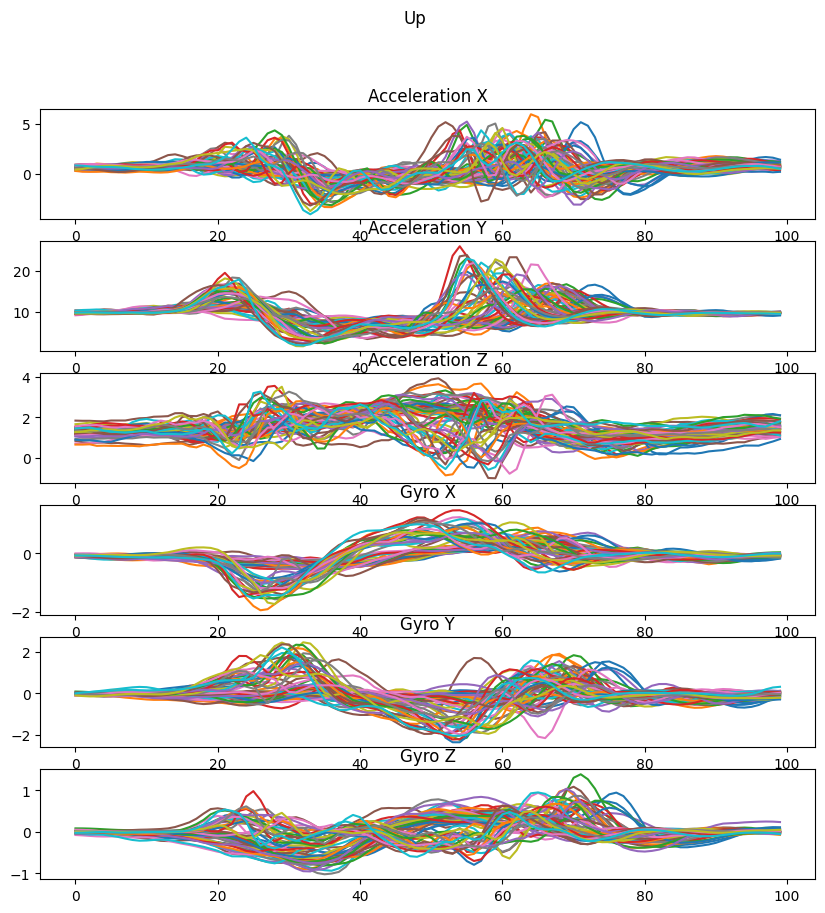

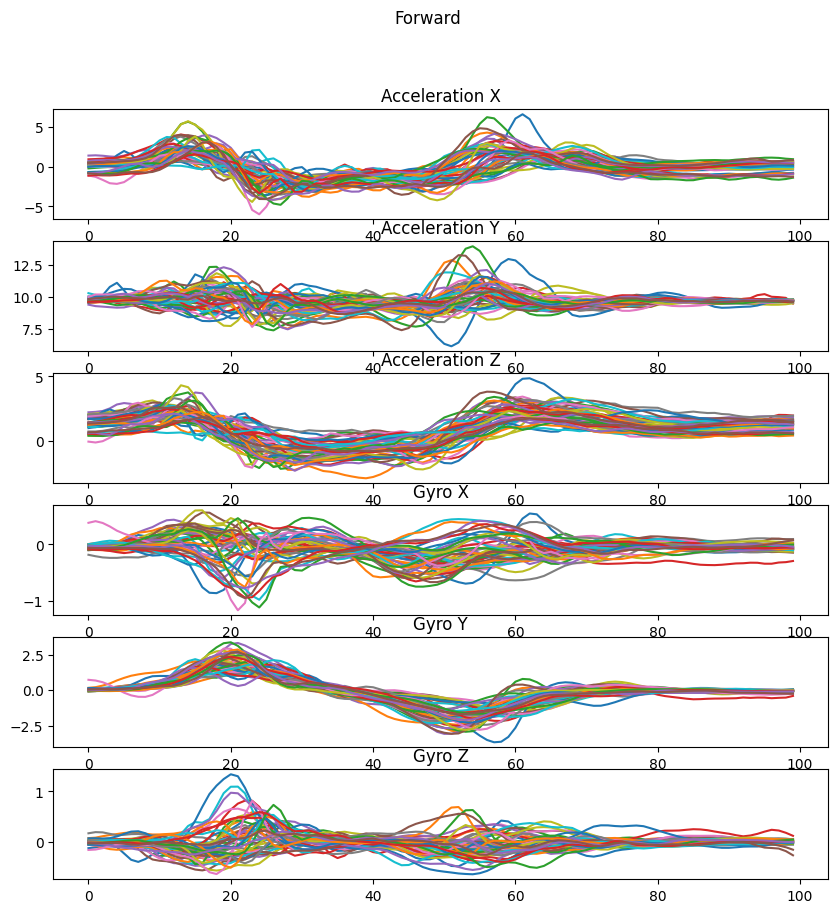

In [5]:
for dir_idx, dir in enumerate(samples.keys()):
    figure = plt.figure(figsize=(10,10))
    figure.suptitle(f'{dir}')
    for axes_idx, axes in enumerate(('Acceleration X',
                                     'Acceleration Y',
                                     'Acceleration Z',
                                     'Gyro X',
                                     'Gyro Y',
                                     'Gyro Z'
                                     )):
        ax = figure.add_subplot(6,1,axes_idx+1)
        ax.set_title(axes)
        for sam in samples[dir]:
            ax.plot(sam[axes_idx::6])

## Define Model

In [6]:
model = RandomForestClassifier(random_state=0, n_estimators=20, max_depth=5)

## Training

In [7]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=0)

## Visualize Results

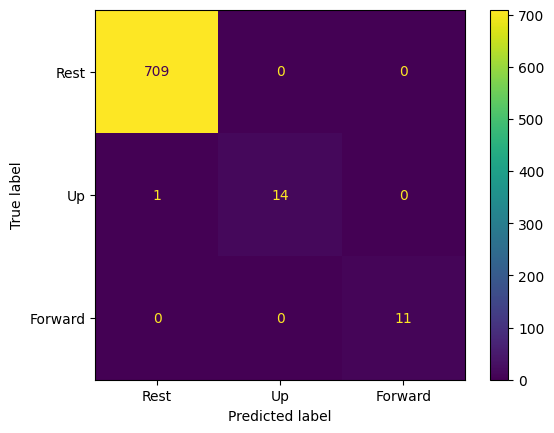

In [8]:
ConfusionMatrixDisplay.from_predictions([{0: 'Rest', 1: 'Up', 2: 'Forward'}.get(i) for i in y_test], 
                                        [{0: 'Rest', 1: 'Up', 2: 'Forward'}.get(i) for i in model.predict(X_test)], 
                                        labels=list(samples.keys()))

## Saving Trained Model

In [9]:
with open("saved_RF_calssifier_2axis.pickle", 'wb') as outfile:
    pickle.dump(model, outfile)

In [10]:
model.predict_proba(np.random.randn(1,600))

array([[0.88695891, 0.01269882, 0.10034227]])